## 1. Install Dependencies

In [1]:
# pip install tensorflow opencv-python numpy matplotlib scikit-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\harsh\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [5]:
# pip list

In [6]:
# For using GPUS
gpus = tf.config.experimental.list_physical_devices('GPU') # Listing GPUs
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

## 2. Load the Data

In [7]:
import numpy as np
import cv2

In [8]:
os.getcwd()

'C:\\Users\\harsh\\Vipul\\ML\\Skin Cancer Diagnosis\\Skin-Cancer-Classification-using-CNN-'

In [9]:
data = tf.keras.utils.image_dataset_from_directory('Dataset',shuffle=True)

Found 9999 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
# Get a batch from the Iterator
batch = data_iterator.next()

In [12]:
len(batch)

2

In [13]:
#Images represnted as Np array
batch[0].shape

(32, 256, 256, 3)

In [14]:
#Class 1 : Malignant
#Class 0 : Benign
batch[1]

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [15]:
# print(ax[idx].astype(int))

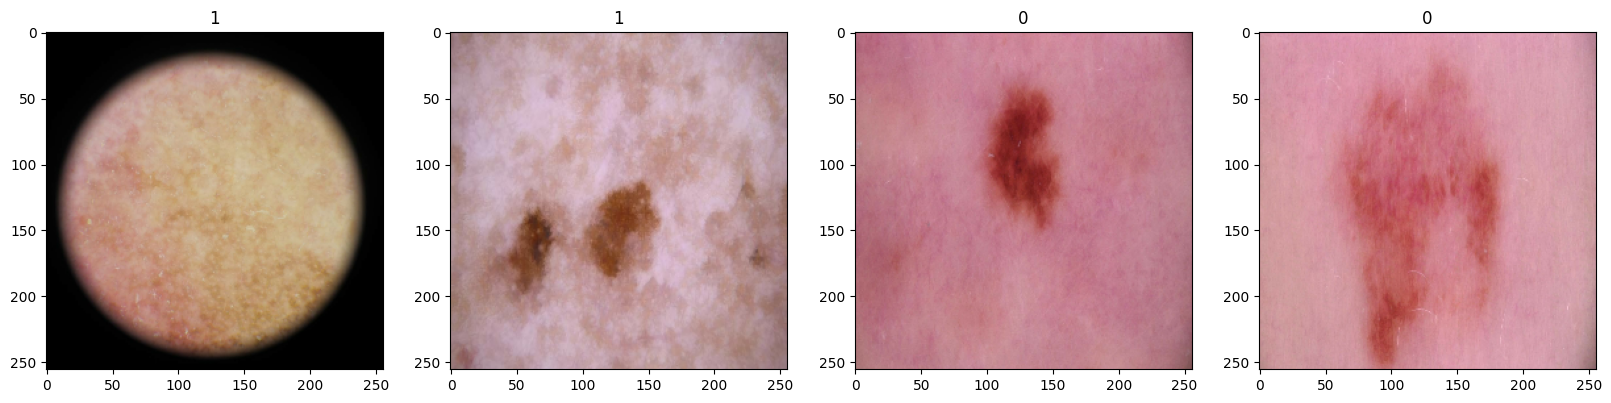

In [16]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. Scaling the Data

In [17]:
# Scaling the Data into 0 or 1
data = data.map(lambda x, y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.6436504 , 0.425     , 0.3162454 ],
          [0.62783396, 0.3846967 , 0.28665748],
          [0.642019  , 0.39888173, 0.30868566],
          ...,
          [0.587117  , 0.35696998, 0.21996017],
          [0.59907323, 0.36892617, 0.23191635],
          [0.58948374, 0.36901808, 0.24217984]],
 
         [[0.6560049 , 0.4050245 , 0.29522058],
          [0.6442019 , 0.4049862 , 0.2951823 ],
          [0.64705884, 0.4117647 , 0.31764707],
          ...,
          [0.59607846, 0.3529412 , 0.20784314],
          [0.60494024, 0.36964613, 0.2245481 ],
          [0.5822457 , 0.36263788, 0.22538297]],
 
         [[0.6605469 , 0.43701747, 0.323292  ],
          [0.6444853 , 0.42487746, 0.32683823],
          [0.6745864 , 0.45497856, 0.36478248],
          ...,
          [0.59044117, 0.3747549 , 0.22181372],
          [0.62218136, 0.3947304 , 0.24963236],
          [0.58345586, 0.37561274, 0.24227941]],
 
         ...,
 
         [[0.5294118 , 0.32941177, 0.25490198],
          [0.52806

In [19]:
batch[0].min()

0.0

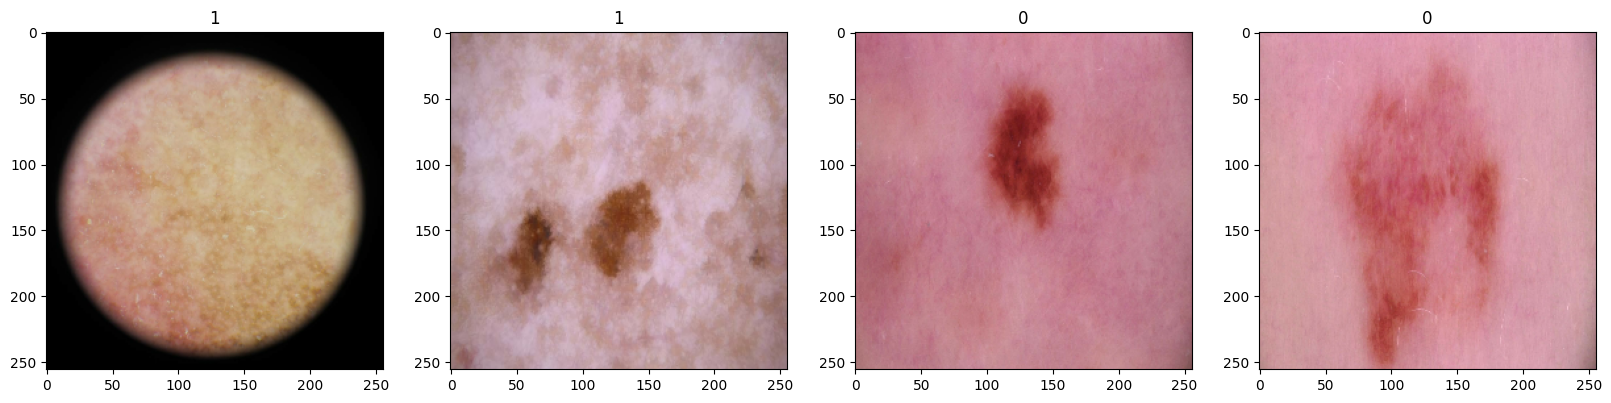

In [20]:
_ ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Splitting the Data

In [21]:
# No. of Batches
len(data)

313

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
# Print the Train, Validate and Test Dataset
print(train_size)
print(val_size)
print(test_size)
# Train + Validate + Test = No. of batches 
# Split your Data Accordingly above

219
62
31


In [24]:
# Data Distribution: 

# Shuffle the Data before adding it here
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
len(test)

31

## 5. Building the model

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
model = Sequential()

In [29]:
#model.add(Conv2D(#filters,#filter-size, stride, activation='relu'))
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

# Add Dense layer with L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Add Dense layer with L2 regularization and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 6. Training the Model

In [33]:
logdir = "logs"

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
  8/219 [>.............................] - ETA: 52s - loss: 4.0713 - accuracy: 0.5391


KeyboardInterrupt



## 7. Plotting Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


## 8. Evaluating the Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test

In [ ]:
y_true_list = []
y_pred_prob_list = []

# Iterate over batches
for batch in test.as_numpy_iterator():
    X, y = batch
    # yhat = model.predict(X).flatten()  # Flatten to get a 1D array
    yhat = model.predict(X, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0).flatten()
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    # Append true labels and predicted probabilities to the lists
    y_true_list.extend(y)
    y_pred_prob_list.extend(yhat)

# Convert probabilities to binary labels using a threshold (e.g., 0.5)
y_pred_list = (np.array(y_pred_prob_list) > 0.5).astype(int)

# Print classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_list, y_pred_list))
print("\nClassification Report:")
print(classification_report(y_true_list, y_pred_list))

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

## 9. Saving the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','test.keras'))

In [ ]:
new_model = load_model('models/skin_cnn_4_79%.keras')

# 10. Testing the model

In [ ]:
img = cv2.imread('Testing/benign5.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = new_model.predict(np.expand_dims(resize/255 , 0))

In [ ]:
if yhat > 0.5 :
    print(f'Malignant')
elif yhat < 0.5 :
    print(f'Benign')